# Percolation

In [45]:
from hoshen_kopelman import hoshen_kopelman as hk
import numpy as np
from numpy.random import binomial, uniform
from matplotlib import pyplot as plt
from tqdm import tqdm

## Hoshen-Kopelman for Cluster Labeling

In [18]:
# construct grid
N = 100
grid = binomial(1, 0.58, (N,N))
labels = np.zeros_like(grid)

# calculate number of clusters
num_clusters = hk(labels, grid)

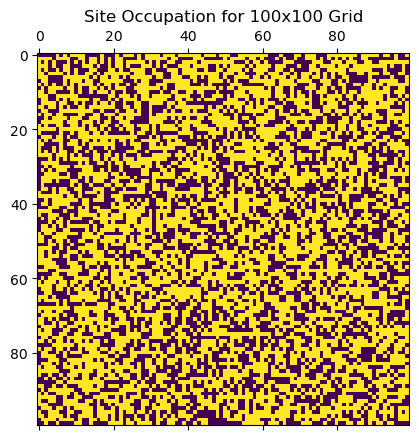

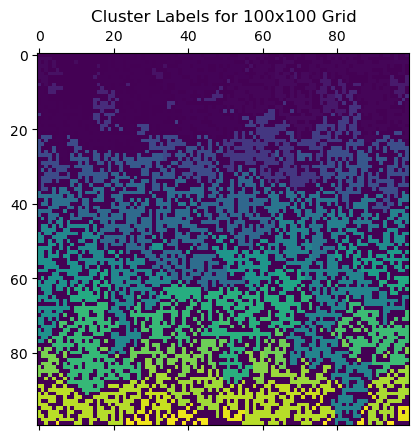

In [20]:
plt.matshow(grid)
plt.title(f"Site Occupation for {N}x{N} Grid")
plt.show()

plt.matshow(labels)
plt.title(f"Cluster Labels for {N}x{N} Grid")
plt.show()

## Monte Carlo for Critical Percolation Density

In [21]:
def has_vertically_spanning_cluster(labels):
    """
    Check if there is a vertically spanning cluster in the labeled grid.

    Args:
    labels (numpy.ndarray): Array of cluster labels

    Returns:
    bool: True if there is a vertically spanning cluster, False otherwise
    """
    N = labels.shape[0]
    spanning_labels = set(labels[0, :])  # Get labels from the top row

    # Check if any of the labels from the top row appear in the bottom row
    for label in spanning_labels:
        if label > 0 and label in labels[-1, :]:
            return True
    return False

# Check for vertically spanning cluster
if has_vertically_spanning_cluster(labels):
    print("There is a vertically spanning cluster.")
else:
    print("No vertically spanning cluster found.")

No vertically spanning cluster found.


In [59]:
# Initialize an array to store the percolation probabilities
Ns = np.array([10,50,100,200,500,1000])
num_samples = 20
ps = np.zeros((len(Ns), num_samples))

# Iterate over the array to calculate percolation probabilities
for i, N in enumerate(Ns):
    print(f"Calculating percolation probability for N = {N}")
    for j in tqdm(range(num_samples)):
        top = 1
        bottom = 0
        ujs = uniform(0,1,(N,N))

        # Perform a binary search to find the percolation probability
        while top - bottom > 1e-6:
            p_guess = (top+bottom)/2
            grid = (ujs < p_guess).astype(int)
            labels = np.zeros_like(grid)
            num_clusters = hk(labels, grid)
            
            # Update bounds based on the presence of a vertically spanning cluster
            if has_vertically_spanning_cluster(labels):
                top = p_guess
            else:
                bottom = p_guess
        ps[i,j] = (top+bottom)/2

Calculating percolation probability for N = 10


100%|██████████| 20/20 [00:00<00:00, 87.21it/s]


Calculating percolation probability for N = 50


100%|██████████| 20/20 [00:03<00:00,  6.10it/s]


Calculating percolation probability for N = 100


100%|██████████| 20/20 [00:12<00:00,  1.63it/s]


Calculating percolation probability for N = 200


100%|██████████| 20/20 [00:35<00:00,  1.75s/it]


Calculating percolation probability for N = 500


100%|██████████| 20/20 [03:55<00:00, 11.75s/it]


Calculating percolation probability for N = 1000


100%|██████████| 20/20 [18:01<00:00, 54.07s/it]


In [60]:
np.savez("percolation_data.npz", Ns=Ns, ps=ps)

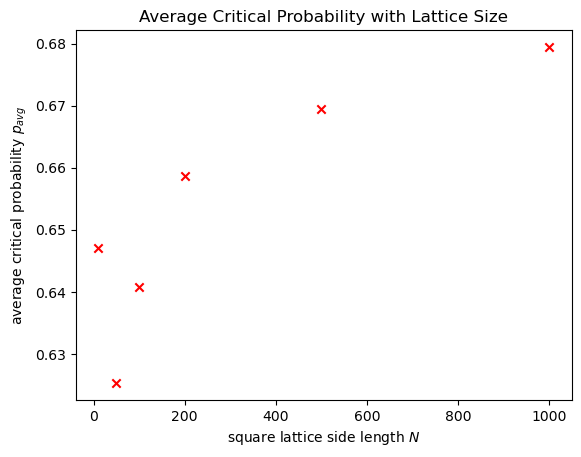

In [61]:
plt.scatter(Ns, np.mean(ps, axis=1), color="r", marker="x")
plt.title(f"Average Critical Probability with Lattice Size")
plt.xlabel(r"square lattice side length $N$")
plt.ylabel(r"average critical probability $p_{avg}$")
plt.show()

In [64]:
logx = np.log(Ns)
logy = np.log(np.sqrt(np.var(ps, axis=1)))
slope, intercept = np.polyfit(logx, logy, 1)
print(f"nu = {-1/slope}")

nu = 2.028478132904987
